# ELBE machine simulation of LA2
## Mirian 19 Nov 2024

In [1]:
import IPython
import numpy
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline
# import from Ocelot main modules and functions
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *

initializing ocelot...
ocelot: 24.03.0


In [2]:
#*********************************************
#*****      LA2 beamline                 *****
#*********************************************

LA2D01 = Drift(l=0.421)
LA2RC10 = Cavity(l=1.038, v=0.010, freq=1.3e9, phi=0.0, eid='LA2RC10')
LA2D02 = Drift(l=0.346)
LA2RC11 = Cavity(l=1.038, v=0.010, freq=1.3e9, phi=0.0, eid='LA2RC10')
LA2D03 = Drift(l=0.421)
exit_Linac2 = Marker(eid='exit_Linac2')

LA2D04 = Drift(l=0.600)
LA2MQ01 = Quadrupole(l = 0.100, k1 = 0.0, tilt = 0.0, eid = 'LA2MQ01')
LA2MQ01.SNo = 98266
LA2MQ01.I1T = 19.5
LA2D05 = Drift(l=0.11)
LA2MQ02 = Quadrupole(l = 0.100, k1 = 0.0, tilt = 0.0, eid = 'LA2MQ02')
LA2MQ01.SNo = 98260
LA2MQ01.I1T = 19.5
LA2D06 = Drift(l=0.106)
LA2DS01 = Monitor(eid = 'BPM_LA2DS01')
LA2D07 = Drift(l=0.516)
LA2DV01 = Monitor(eid = 'SCR_LA2DV01')
LA2D08 = Drift(l=0.528)
LA2MQ03 = Quadrupole(l = 0.100, k1 = 0.0, tilt = 0.0, eid = 'LA2MQ03')
LA2MQ01.SNo = 98255
LA2MQ01.I1T = 19.5
LA2D09 = Drift(l=0.149)
LA2DV02 = Monitor(eid = 'SCR_LA2DV02')
LA2D10 = Drift(l=0.085)
LA2DS02 = Monitor(eid = 'BPM_LA2DS02')
LA2D11 = Drift(l=0.229736)

entrance_edge_LA2MD01 = Marker(eid='entrance_edge_LA2MD01')

BL_LA2 = (LA2D01, LA2RC10, LA2D02, LA2RC11, LA2D03, exit_Linac2,
    LA2D04, LA2MQ01, LA2D05, LA2MQ02, LA2D06, LA2DS01, LA2D07, LA2DV01,
    LA2D08, LA2MQ03, LA2D09, LA2DV02, LA2D10, LA2DS02, LA2D11, entrance_edge_LA2MD01)

#lat = MagneticLattice(BL_LA2, stop=None)

In [3]:
lat = MagneticLattice(BL_LA2)

# to see total lenth of the lattice 
print("length of the cell: ", lat.totalLen, "m")

# or, for example, you can get R matrix for whole lattice

B, R, T = lat.transfer_maps(energy=0.005)
print(R)

length of the cell:  5.887735999999999 m
[[-0.63528365  1.58579483  0.          0.          0.          0.        ]
 [-0.21367469  0.21855468  0.          0.          0.          0.        ]
 [ 0.          0.         -0.63528365  1.58579483  0.          0.        ]
 [ 0.          0.         -0.21367469  0.21855468  0.          0.        ]
 [ 0.          0.          0.          0.          1.         -0.00743995]
 [ 0.          0.          0.          0.          0.          0.19899435]]


In [4]:
# initialization of Twiss object
tws0 = Twiss()
# defining initial twiss parameters
tws0.beta_x = 29.171
tws0.beta_y = 29.171
tws0.alpha_x = 10.955
tws0.alpha_y = 10.955
# defining initial electron energy in GeV
tws0.E = 0.025 #  5 mev /// 0.005 Gev 

# calculate optical functions with initial twiss parameters
tws = twiss(lat, tws0, nPoints=None)

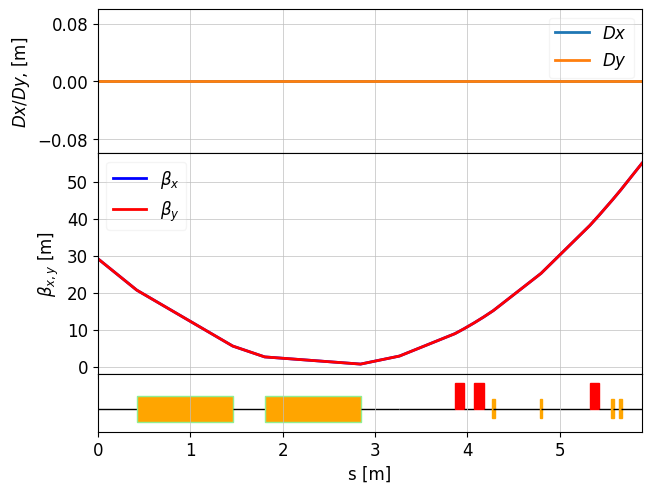

In [5]:
# ploting twiss paramentrs.
plot_opt_func(lat, tws, top_plot=["Dx", "Dy"],  fig_name="i1", legend=False)
plt.show()

In [6]:
print(tws[-1])

emit_x  = 0.0
emit_y  = 0.0
beta_x  = 54.923032423381315
beta_y  = 54.923032423381315
alpha_x = -16.240391076093868
alpha_y = -16.240391076093868
gamma_x = 4.820387560970912
gamma_y = 4.820387560970912
Dx      = 0.0
Dy      = 0.0
Dxp     = 0.0
Dyp     = 0.0
mux     = 3.003049343630196
muy     = 3.003049343630196
nu_x    = 0.47795014738761754
nu_y    = 0.47795014738761754
E       = 0.045000000000000005
s        = 5.887735999999999

